## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_columns",None)

## Data Loading

In [3]:
df=pd.read_csv("input/women.csv")

In [4]:
df.shape

(12134, 22)

In [5]:
df.head()

,category,subcategory,name,current_price,raw_price,currency,discount,likes_count,is_new,brand,brand_url,codCountry,variation_0_color,variation_1_color,variation_0_thumbnail,variation_0_image,variation_1_thumbnail,variation_1_image,image_url,url,id,model
0,women,T-shirts,T-shirt boutonné à manches courtes et imprimé ...,23.99,46.99,USD,49.0,313.0,False,NaN,NaN,"ID,MY,PH,SG,TH,VN",White,Navy,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/t-shirts-3666/p-1690810...,1690810.0,SKUF40137
1,women,Soutiens-gorge,Plus Soutiens-gorge avec fermeture à l'avant,15.99,40.36,USD,60.0,4603.0,False,NaN,NaN,"ID,MY,PH,SG,TH,VN",blanc,gris,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/bra-and-bra-set-4183/p-...,1533303.0,SKUC91583
2,women,Pantalons & Shorts,Pantalon décontracté à taille élastique de cou...,25.99,50.99,USD,49.0,5564.0,False,NaN,NaN,"ID,MY,PH,SG,TH,VN",Khaki,Black,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/pants-and-capris-3674/p...,1661710.0,SKUE94621
3,women,Robes imprimées,Robe midi décontractée à imprimé floral,23.99,46.99,USD,49.0,1262.0,False,NaN,NaN,"ID,MY,PH,SG,TH,VN",Khaki,White,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/print-dresses-3677/p-16...,1691484.0,SKUF41372
4,women,T-shirts,T-shirt brodé de fleurs,15.99,38.88,USD,59.0,4485.0,False,NaN,NaN,"ID,MY,PH,SG,TH,VN",Green,Sky Blue,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/t-shirts-3666/p-1655044...,1655044.0,SKUE83526


## Data Preprocessing

In [6]:
df.isnull().sum()

category                     0
subcategory                  0
name                         0
current_price                1
raw_price                    1
currency                     1
discount                     1
likes_count                  1
is_new                       1
brand                     8115
brand_url                10794
codCountry                 427
variation_0_color           30
variation_1_color         2461
variation_0_thumbnail       30
variation_0_image           30
variation_1_thumbnail     2461
variation_1_image         2461
image_url                    1
url                          1
id                           1
model                        1
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

category                 0
subcategory              0
name                     0
current_price            0
raw_price                0
currency                 0
discount                 0
likes_count              0
is_new                   0
brand                    0
brand_url                0
codCountry               0
variation_0_color        0
variation_1_color        0
variation_0_thumbnail    0
variation_0_image        0
variation_1_thumbnail    0
variation_1_image        0
image_url                0
url                      0
id                       0
model                    0
dtype: int64

In [10]:
df.shape

(971, 22)

In [11]:
df.head()

,category,subcategory,name,current_price,raw_price,currency,discount,likes_count,is_new,brand,brand_url,codCountry,variation_0_color,variation_1_color,variation_0_thumbnail,variation_0_image,variation_1_thumbnail,variation_1_image,image_url,url,id,model
8,women,Pantalons & Shorts,Pantalon décontracté à fleurs,21.99,47.99,USD,54.0,3095.0,False,Gracila,https://fr.newchic.com/gracila-brand-247.html,"ID,MY,PH,SG,TH,VN",Blue,Yellow,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/gracila-pants-and-capri...,1663956.0,SKUE99093
9,women,Pantalons & Shorts,Pantalon décontracté à cordon de couleur unie,23.51,45.99,USD,49.0,4367.0,False,Gracila,https://fr.newchic.com/gracila-brand-247.html,"ID,MY,PH,SG,TH,VN",Grey,Green,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/gracila-pants-and-capri...,1617649.0,SKUE10410
11,women,Vestes & Gilets,Vestes à imprimé floral de style ethnique,25.99,72.47,USD,64.0,4393.0,False,O-NEWE,https://fr.newchic.com/o-newe-brand-465.html,"ID,MY,PH,SG,TH,VN",Green,Red,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/o-newe-plus-size-coats-...,1561403.0,SKUD02476
15,women,Pantalons & Shorts,Sarouel croisé décontracté,16.99,48.37,USD,65.0,3486.0,False,O-NEWE,https://fr.newchic.com/o-newe-brand-465.html,"ID,MY,PH,SG,TH,VN",Black,Blue,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/o-newe-plus-size-pants-...,1667484.0,SKUF04567
16,women,T-shirts,T-shirt imprimé poisson,17.99,39.99,USD,55.0,3542.0,False,Gracila,https://fr.newchic.com/gracila-brand-247.html,"ID,MY,PH,SG,TH,VN",Green,Blue,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/gracila-t-shirts-3666/p...,1656834.0,SKUE84599


In [12]:
df["category"].unique()

array(['women'], dtype=object)

In [13]:
df["subcategory"].unique()

array(['Pantalons & Shorts', 'Vestes & Gilets', 'T-shirts',
       'Blouses & Chemises', 'Combinaisons & Grenouillères',
       'Robes imprimées', 'Chemises', 'Jackets', 'Pulls & Cardigans',
       'Robes', 'Combinaison & Salopette', 'Robes maxi',
       'Robes décontractées', 'Robes vintage', 'Hoodies',
       'Hoodies & Sweatshirts', 'Soutiens-gorge', 'Shorts',
       'Grande Taille', 'Survêtements', 'Combinaison', 'Débardeurs',
       'Culotte haute', 'Maillots de bain', 'Tankinis', 'Kimonos',
       'Kimonos & Tank Tops', 'Cover-Ups', 'Une-Pièces',
       'Bikinis &Tankinis', 'Brassières de sport', 'Bas', 'Sweatershirts',
       'Shorts & Jupes'], dtype=object)

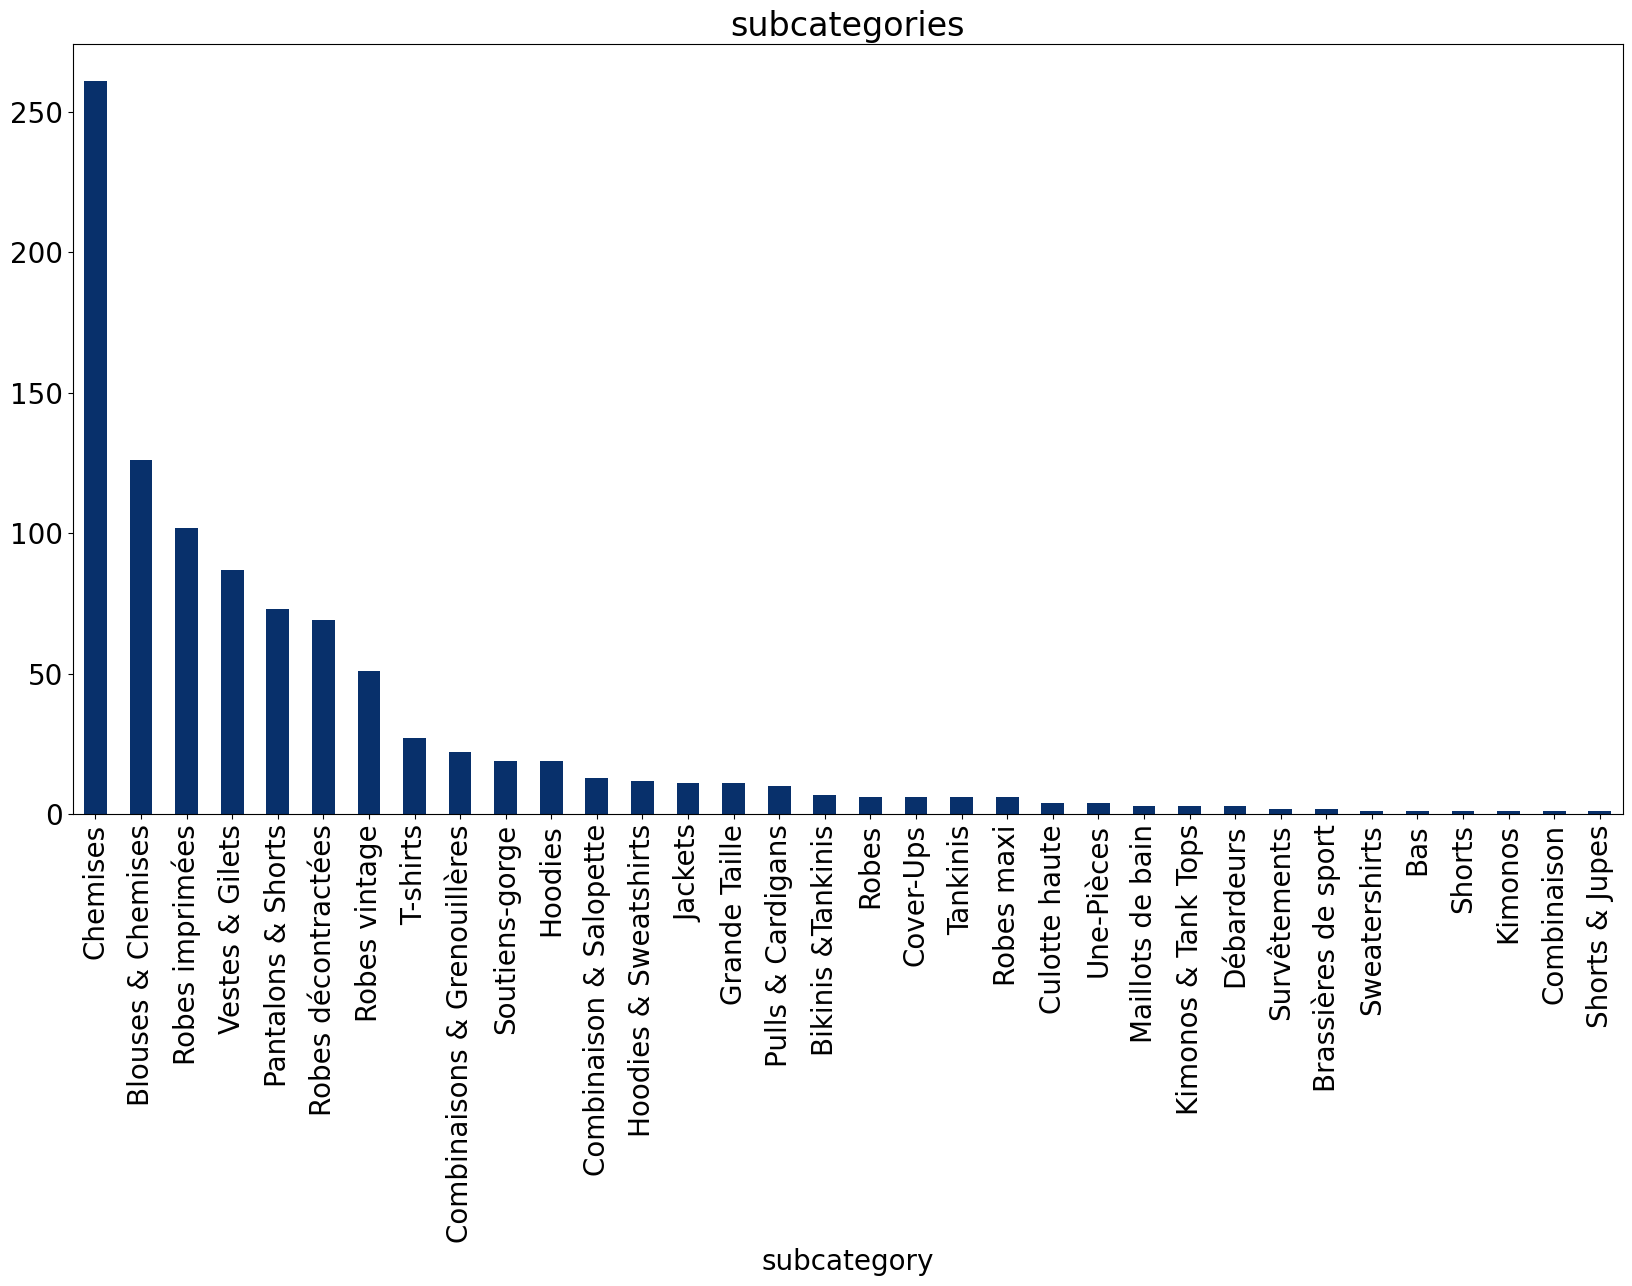

In [14]:
plt.rcParams["font.size"]=20
df["subcategory"].value_counts().plot.bar(figsize=(20, 10),fontsize=20,title="subcategories",colormap="Blues_r")
plt.show()

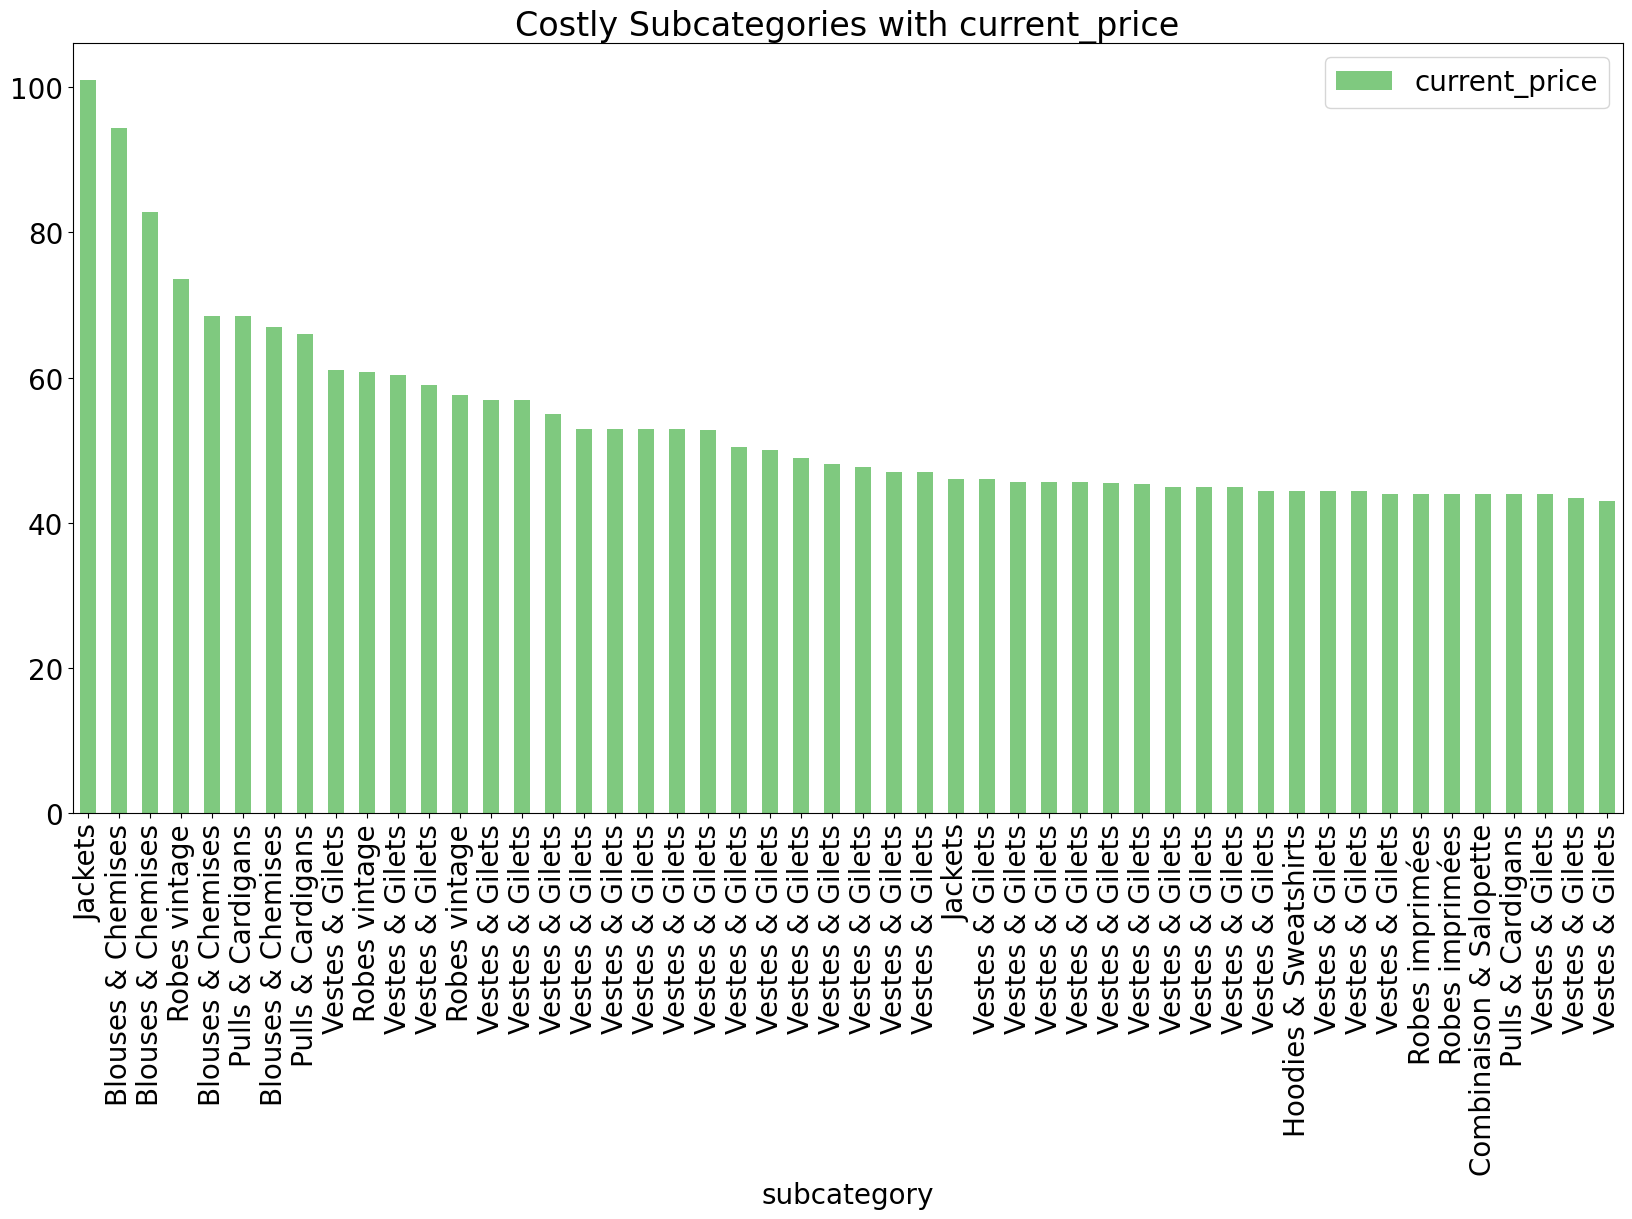

In [15]:
dirc=df[["subcategory","current_price"]]
dirc=dirc.set_index("subcategory")
plt.rcParams["font.size"]=20
dirc.sort_values(by="current_price",ascending=False)[:50].plot.bar(figsize=(20, 10),fontsize=20,title="Costly Subcategories with current_price",colormap="Accent")
plt.show()

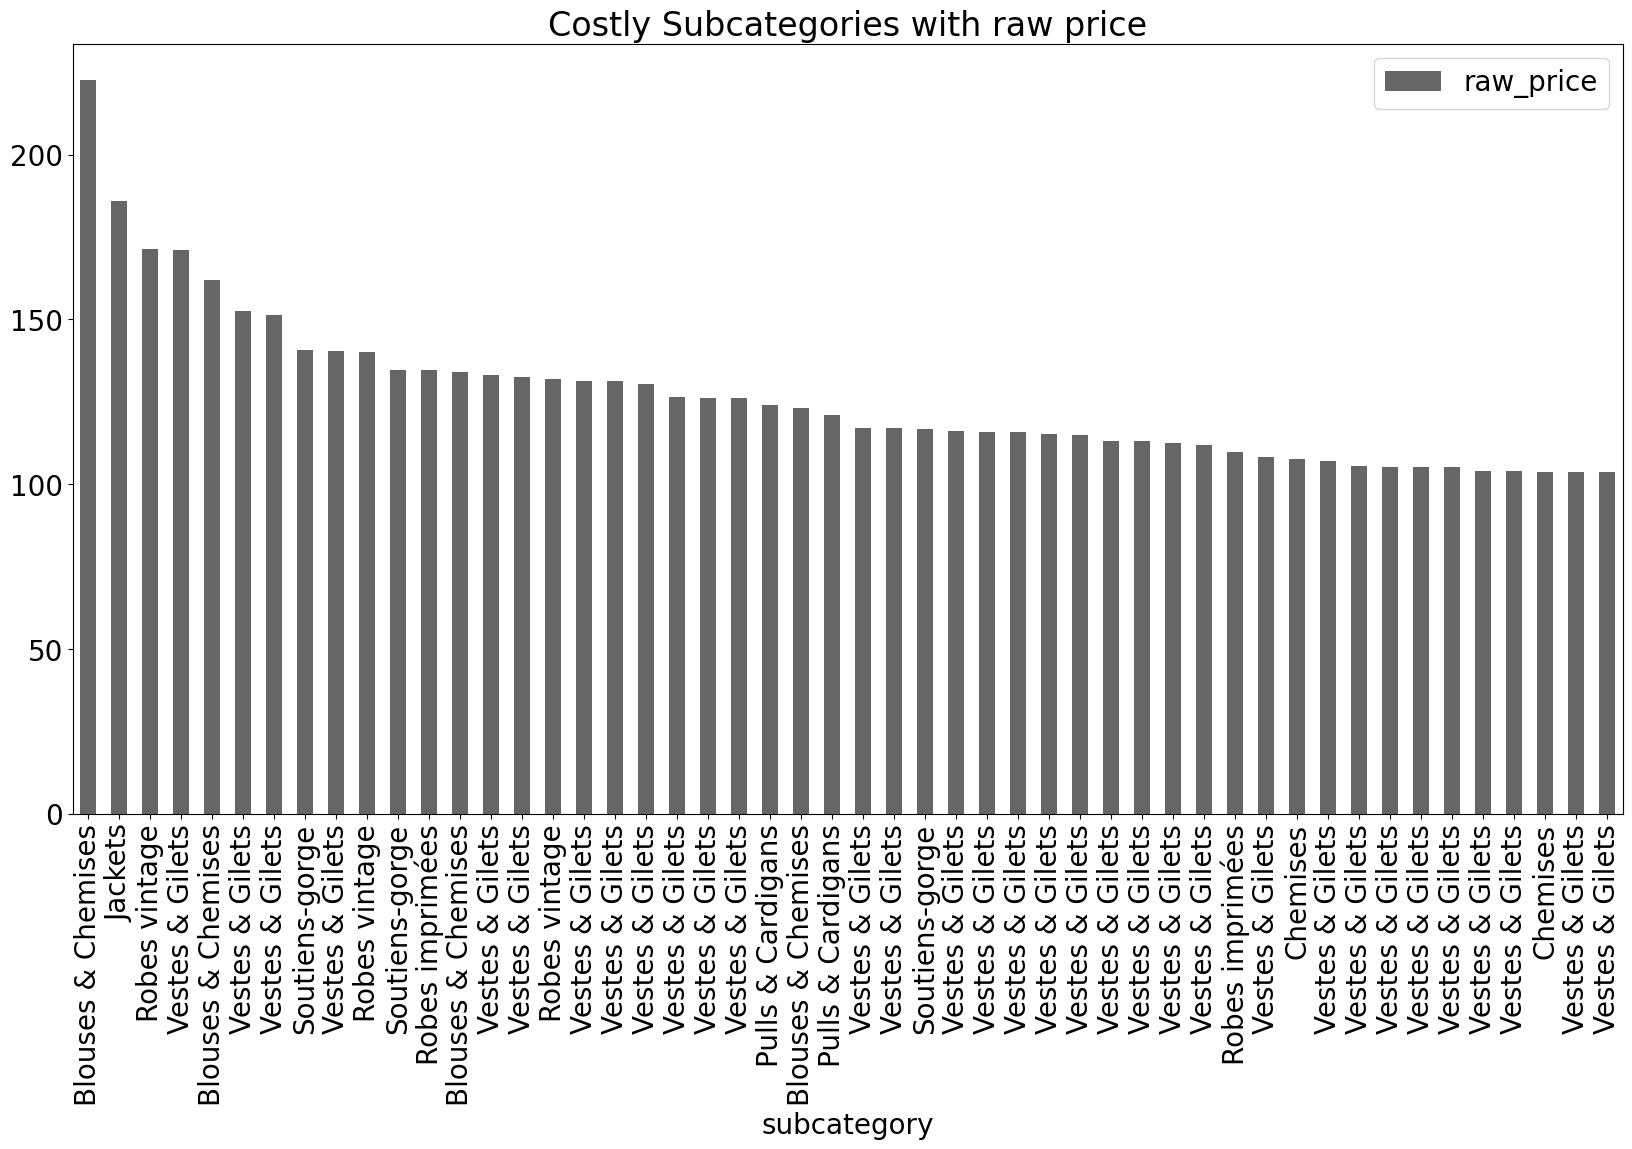

In [16]:
dirc=df[["subcategory","raw_price"]]
dirc=dirc.set_index("subcategory")
plt.rcParams["font.size"]=20
dirc.sort_values(by="raw_price",ascending=False)[:50].plot.bar(figsize=(20, 10),fontsize=20,title="Costly Subcategories with raw price",colormap="Accent_r")
plt.show()

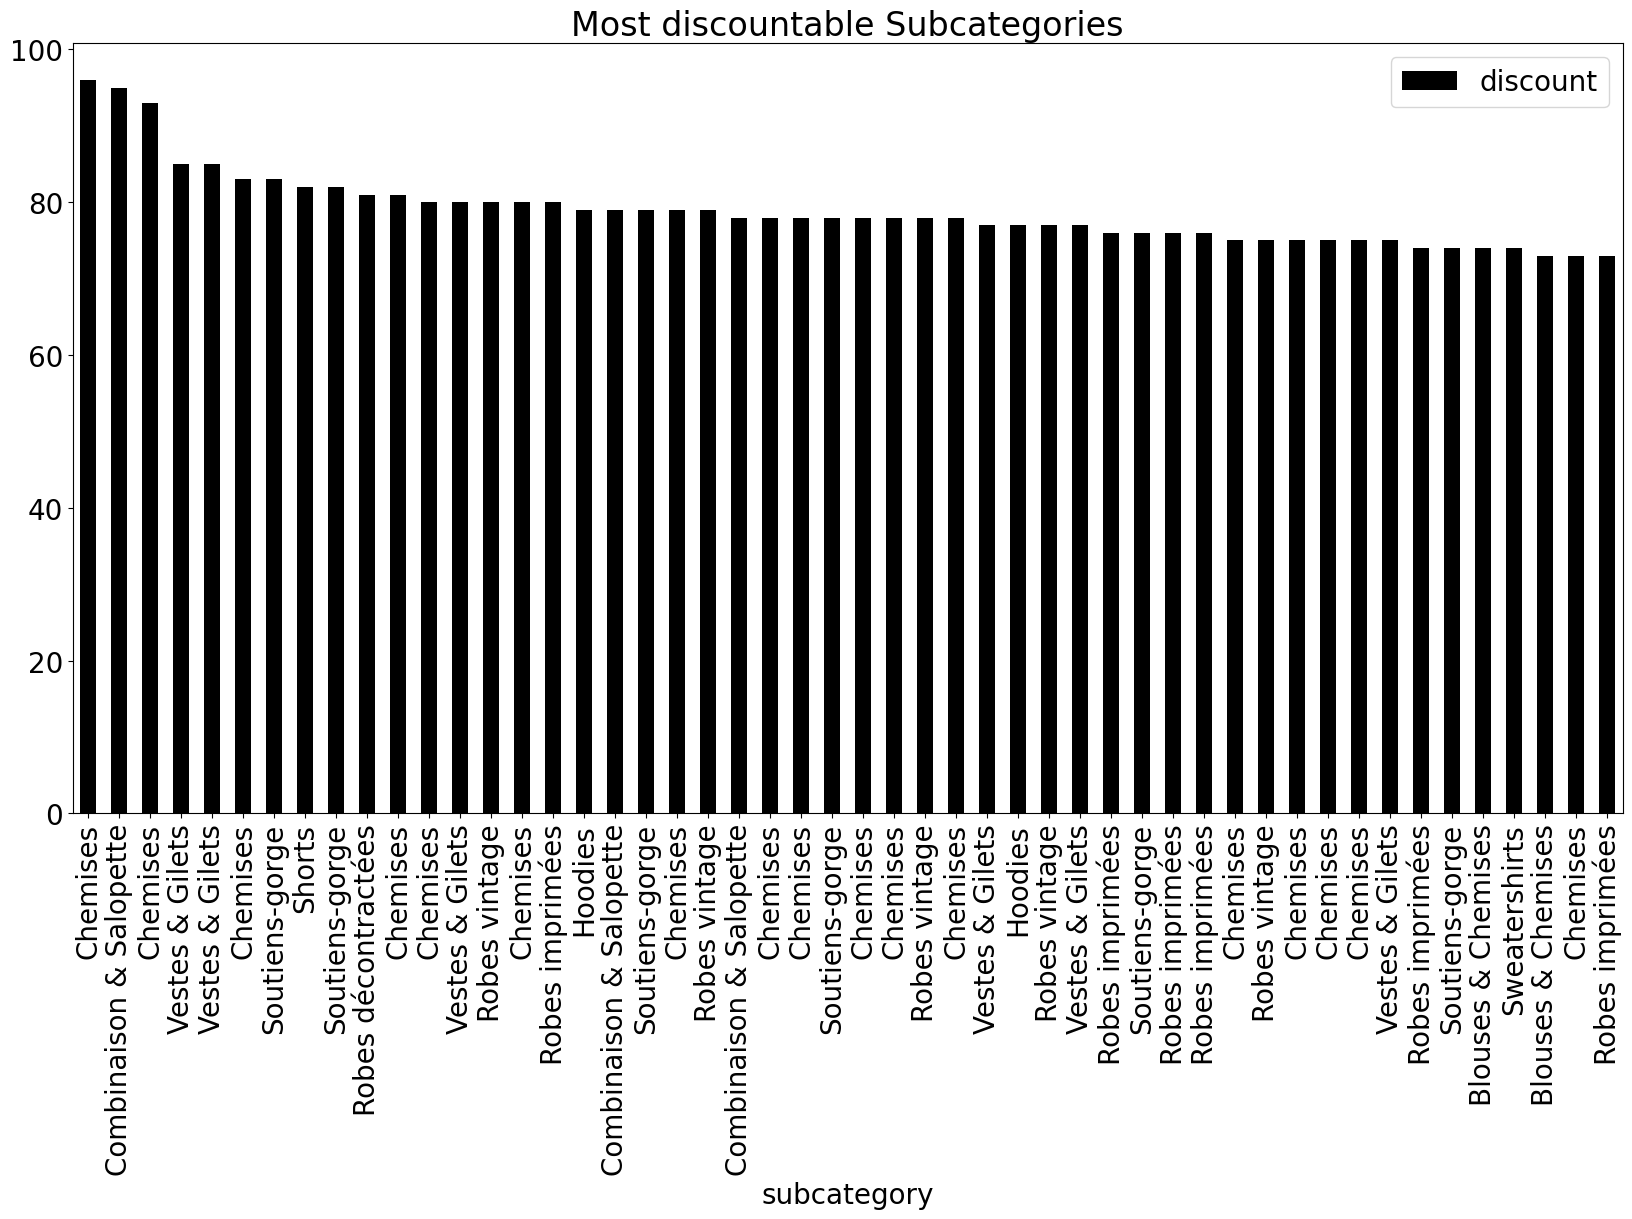

In [17]:
dirc=df[["subcategory","discount"]]
dirc=dirc.set_index("subcategory")
plt.rcParams["font.size"]=20
dirc.sort_values(by="discount",ascending=False)[:50].plot.bar(figsize=(20, 10),fontsize=20,title="Most discountable Subcategories",colormap="afmhot")
plt.show()

In [18]:
df.head()

,category,subcategory,name,current_price,raw_price,currency,discount,likes_count,is_new,brand,brand_url,codCountry,variation_0_color,variation_1_color,variation_0_thumbnail,variation_0_image,variation_1_thumbnail,variation_1_image,image_url,url,id,model
8,women,Pantalons & Shorts,Pantalon décontracté à fleurs,21.99,47.99,USD,54.0,3095.0,False,Gracila,https://fr.newchic.com/gracila-brand-247.html,"ID,MY,PH,SG,TH,VN",Blue,Yellow,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/gracila-pants-and-capri...,1663956.0,SKUE99093
9,women,Pantalons & Shorts,Pantalon décontracté à cordon de couleur unie,23.51,45.99,USD,49.0,4367.0,False,Gracila,https://fr.newchic.com/gracila-brand-247.html,"ID,MY,PH,SG,TH,VN",Grey,Green,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/gracila-pants-and-capri...,1617649.0,SKUE10410
11,women,Vestes & Gilets,Vestes à imprimé floral de style ethnique,25.99,72.47,USD,64.0,4393.0,False,O-NEWE,https://fr.newchic.com/o-newe-brand-465.html,"ID,MY,PH,SG,TH,VN",Green,Red,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/o-newe-plus-size-coats-...,1561403.0,SKUD02476
15,women,Pantalons & Shorts,Sarouel croisé décontracté,16.99,48.37,USD,65.0,3486.0,False,O-NEWE,https://fr.newchic.com/o-newe-brand-465.html,"ID,MY,PH,SG,TH,VN",Black,Blue,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/o-newe-plus-size-pants-...,1667484.0,SKUF04567
16,women,T-shirts,T-shirt imprimé poisson,17.99,39.99,USD,55.0,3542.0,False,Gracila,https://fr.newchic.com/gracila-brand-247.html,"ID,MY,PH,SG,TH,VN",Green,Blue,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/gracila-t-shirts-3666/p...,1656834.0,SKUE84599


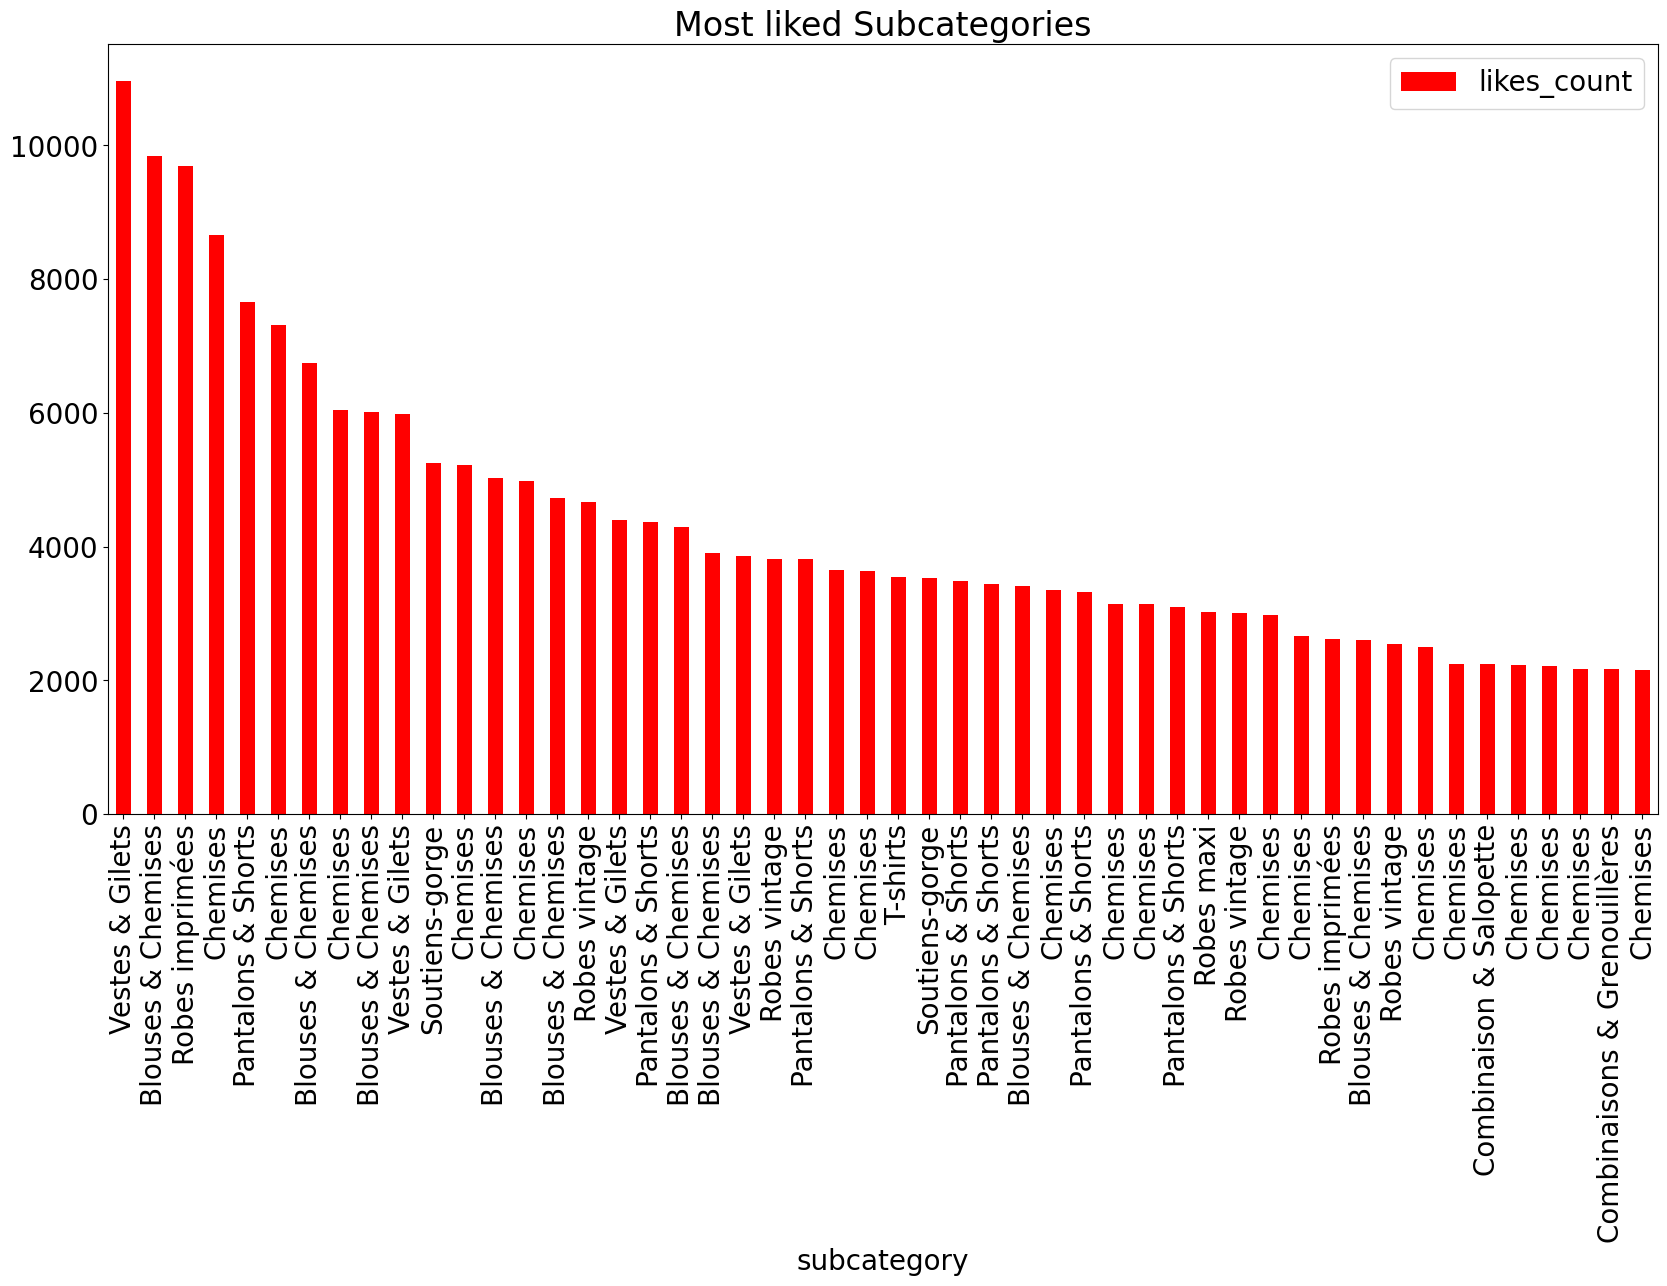

In [19]:
dirc=df[["subcategory","likes_count"]]
dirc=dirc.set_index("subcategory")
plt.rcParams["font.size"]=20
dirc.sort_values(by="likes_count",ascending=False)[:50].plot.bar(figsize=(20, 10),fontsize=20,title="Most liked Subcategories",colormap="prism")
plt.show()

In [20]:
df_new=df[["category","subcategory","current_price","raw_price","currency","discount","likes_count","is_new","brand"]]

In [21]:
df_new.head()

,category,subcategory,current_price,raw_price,currency,discount,likes_count,is_new,brand
8,women,Pantalons & Shorts,21.99,47.99,USD,54.0,3095.0,False,Gracila
9,women,Pantalons & Shorts,23.51,45.99,USD,49.0,4367.0,False,Gracila
11,women,Vestes & Gilets,25.99,72.47,USD,64.0,4393.0,False,O-NEWE
15,women,Pantalons & Shorts,16.99,48.37,USD,65.0,3486.0,False,O-NEWE
16,women,T-shirts,17.99,39.99,USD,55.0,3542.0,False,Gracila


In [22]:
data=df_new.copy()
data.head()

,category,subcategory,current_price,raw_price,currency,discount,likes_count,is_new,brand
8,women,Pantalons & Shorts,21.99,47.99,USD,54.0,3095.0,False,Gracila
9,women,Pantalons & Shorts,23.51,45.99,USD,49.0,4367.0,False,Gracila
11,women,Vestes & Gilets,25.99,72.47,USD,64.0,4393.0,False,O-NEWE
15,women,Pantalons & Shorts,16.99,48.37,USD,65.0,3486.0,False,O-NEWE
16,women,T-shirts,17.99,39.99,USD,55.0,3542.0,False,Gracila


In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
encoder = LabelEncoder()
categorical_features = ["category","subcategory","currency","is_new","brand"]
for each in categorical_features:
    df_new[each] = encoder.fit_transform(df_new[each])

In [25]:
df_new.head()

,category,subcategory,current_price,raw_price,currency,discount,likes_count,is_new,brand
8,0,18,21.99,47.99,0,54.0,3095.0,0,6
9,0,18,23.51,45.99,0,49.0,4367.0,0,6
11,0,33,25.99,72.47,0,64.0,4393.0,0,13
15,0,18,16.99,48.37,0,65.0,3486.0,0,13
16,0,30,17.99,39.99,0,55.0,3542.0,0,6


## Clustering process

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5,random_state=42)

kmeans.fit(df_new)

labels = kmeans.labels_

In [27]:
data["clusters"]=labels

In [28]:
data.head(10)

,category,subcategory,current_price,raw_price,currency,discount,likes_count,is_new,brand,clusters
8,women,Pantalons & Shorts,21.99,47.99,USD,54.0,3095.0,False,Gracila,1
9,women,Pantalons & Shorts,23.51,45.99,USD,49.0,4367.0,False,Gracila,1
11,women,Vestes & Gilets,25.99,72.47,USD,64.0,4393.0,False,O-NEWE,1
15,women,Pantalons & Shorts,16.99,48.37,USD,65.0,3486.0,False,O-NEWE,1
16,women,T-shirts,17.99,39.99,USD,55.0,3542.0,False,Gracila,1
27,women,Blouses & Chemises,22.99,51.99,USD,56.0,4726.0,False,Gracila,1
31,women,Combinaisons & Grenouillères,30.66,52.98,USD,42.0,2170.0,False,Gracila,3
35,women,Pantalons & Shorts,18.99,42.20,USD,55.0,1688.0,False,O-NEWE,3
51,women,T-shirts,20.44,38.88,USD,47.0,1642.0,False,Gracila,3
52,women,Robes imprimées,32.99,72.99,USD,55.0,727.0,False,Gracila,0


In [29]:
data["clusters"].value_counts()

clusters
4    691
0    180
3     62
1     31
2      7
Name: count, dtype: int64

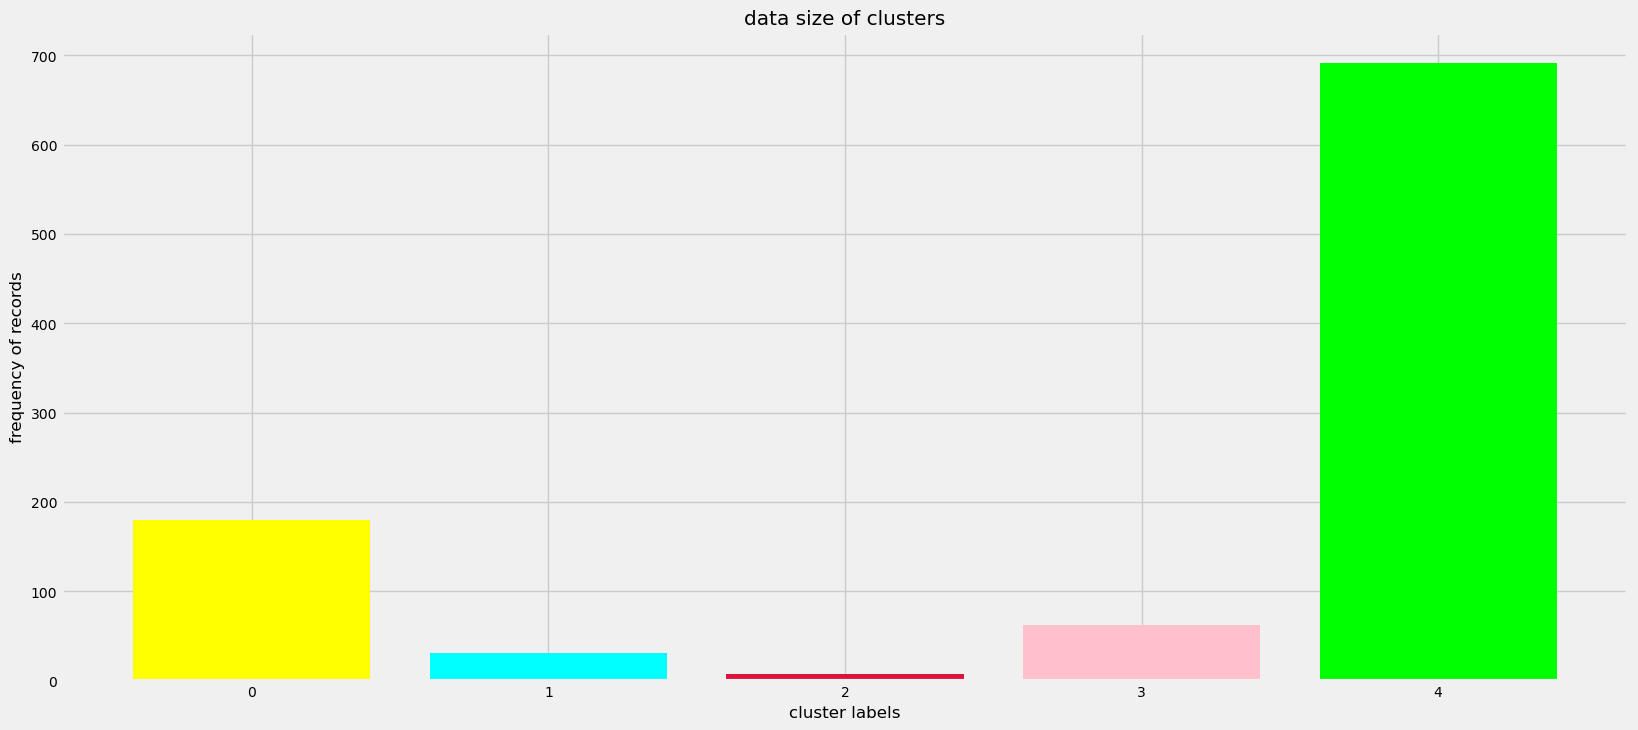

In [30]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams["font.size"]=10
    chart_data=dict(data["clusters"].value_counts())
    plt.bar(height=chart_data.values(),x=chart_data.keys(),color=["lime","yellow","pink","aqua","crimson"])
    plt.title(label="data size of clusters")
    plt.xlabel(xlabel="cluster labels")
    plt.ylabel(ylabel="frequency of records")
    plt.show()

In [31]:
clusters_dataframes=[]
for label in range(5):
    clusters_dataframes.append(data.loc[data['clusters']==label])
for index,dataframe in enumerate(clusters_dataframes):
    dataframe=dataframe.reset_index(drop=True)
    dataframe.to_csv(f"clustered_data/cluster_{index}.csv",index=False)

## Thank You